# Airbnb property price

### Loading the dataset

In [97]:
# import kagglehub
#
# # Download latest version
# path = kagglehub.dataset_download("PromptCloudHQ/airbnb-property-data-from-texas")
#
# print("Path to dataset files:", path)

### Importing libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## EDA

In [99]:
ds = pd.read_csv('Airbnb_Texas_Rentals.csv')
ds.head(10)

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,3,$59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,4,$60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,5,$75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...
5,6,$250,4,Conroe,August 2016,"My place is close to Lake Conroe, family-frien...",30.370455,-95.385319,Gorgeous Home with Country Setting,https://www.airbnb.com/rooms/14466133?location...
6,7,$129,3,Cedar Creek,March 2016,Rustic country retreat on 8 acres southeast of...,30.109838,-97.473417,Cozy and Quaint Country Retreat with Acreage.,https://www.airbnb.com/rooms/12491762?location...
7,8,$25,1,Fort Worth,January 2016,This is a beautiful bedroom with a queen size ...,32.689611,-97.298161,Friendly Private Room in َQuiet Neighborhood,https://www.airbnb.com/rooms/18977363?location...
8,9,$345,3,Rockport,February 2016,First class and comfortable condo with the bes...,28.103726,-97.025832,608 - Bayfront Condos,https://www.airbnb.com/rooms/17559848?location...
9,10,$72,Studio,San Antonio,August 2013,Private entrance to your own \,29.480646,-98.495692,Cozy Historic Private Studio,https://www.airbnb.com/rooms/1588127?location=...


### Drop unimportant columns

In [100]:
ds.drop(columns=['title', 'description', 'Unnamed: 0', 'url'], inplace=True, axis=1)

In [101]:
ds.head()

,average_rate_per_night,bedrooms_count,city,date_of_listing,latitude,longitude
0,$27,2,Humble,May 2016,30.020138,-95.293996
1,$149,4,San Antonio,November 2010,29.503068,-98.447688
2,$59,1,Houston,January 2017,29.829352,-95.081549
3,$60,1,Bryan,February 2016,30.637304,-96.337846
4,$75,2,Fort Worth,February 2017,32.747097,-97.286434



### Checking for missing values

In [102]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   average_rate_per_night  18231 non-null  object 
 1   bedrooms_count          18256 non-null  object 
 2   city                    18259 non-null  object 
 3   date_of_listing         18259 non-null  object 
 4   latitude                18225 non-null  float64
 5   longitude               18225 non-null  float64
dtypes: float64(2), object(4)
memory usage: 856.0+ KB


In [103]:
ds.describe()

,latitude,longitude
count,18225.000000,18225.000000
mean,30.684906,-97.076785
std,1.671008,1.328314
min,25.894075,-103.690925
25%,29.693117,-97.817193
50%,30.275907,-97.134467
75%,32.671095,-96.307023
max,35.256299,-93.771139


In [104]:
ds.shape

(18259, 6)

In [105]:
for c in ds.columns:
    print(c, ds.duplicated(c).sum())

average_rate_per_night 17558
bedrooms_count 18245
city 17754
date_of_listing 18157
latitude 6742
longitude 6742


In [106]:
ds.isnull().sum()

average_rate_per_night    28
bedrooms_count             3
city                       0
date_of_listing            0
latitude                  34
longitude                 34
dtype: int64

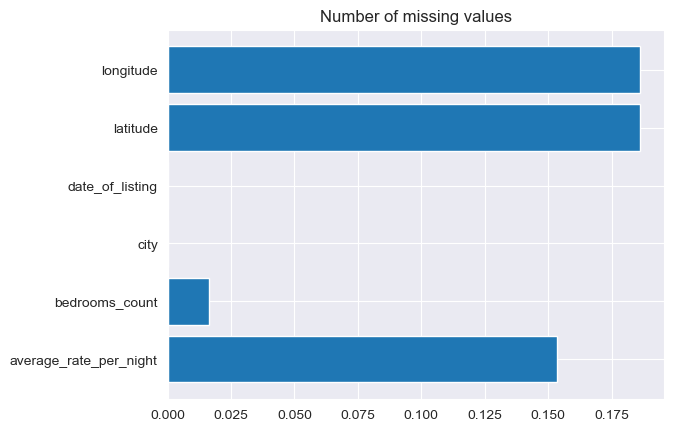

In [107]:
num_of_missing = ds.isnull().sum()

plt.title('Number of missing values')
plt.barh((num_of_missing / len(ds) * 100).index, (num_of_missing / len(ds) * 100).values)
plt.grid(True)
plt.show()

In [108]:
ds.dtypes

average_rate_per_night     object
bedrooms_count             object
city                       object
date_of_listing            object
latitude                  float64
longitude                 float64
dtype: object

### Handling missing values and categorical columns

In [109]:
numerical_columns = [f for f in ds.columns if ds[f].dtype != 'O']

In [110]:
numerical_columns

['latitude', 'longitude']

In [111]:
categorical_columns = [f for f in ds.columns if ds[f].dtype == 'O']

In [112]:
categorical_columns

['average_rate_per_night', 'bedrooms_count', 'city', 'date_of_listing']

In [113]:
ds[numerical_columns].isnull().sum()

latitude     34
longitude    34
dtype: int64

In [114]:
ds["average_rate_per_night"] = ds['average_rate_per_night'].str.replace('$', '')

In [115]:
ds.head(10)

,average_rate_per_night,bedrooms_count,city,date_of_listing,latitude,longitude
0,27,2,Humble,May 2016,30.020138,-95.293996
1,149,4,San Antonio,November 2010,29.503068,-98.447688
2,59,1,Houston,January 2017,29.829352,-95.081549
3,60,1,Bryan,February 2016,30.637304,-96.337846
4,75,2,Fort Worth,February 2017,32.747097,-97.286434
5,250,4,Conroe,August 2016,30.370455,-95.385319
6,129,3,Cedar Creek,March 2016,30.109838,-97.473417
7,25,1,Fort Worth,January 2016,32.689611,-97.298161
8,345,3,Rockport,February 2016,28.103726,-97.025832
9,72,Studio,San Antonio,August 2013,29.480646,-98.495692


In [116]:
ds['average_rate_per_night'] = ds['average_rate_per_night'].astype('float')

In [117]:
ds.dtypes

average_rate_per_night    float64
bedrooms_count             object
city                       object
date_of_listing            object
latitude                  float64
longitude                 float64
dtype: object

In [118]:
ds.head(10)

,average_rate_per_night,bedrooms_count,city,date_of_listing,latitude,longitude
0,27.0,2,Humble,May 2016,30.020138,-95.293996
1,149.0,4,San Antonio,November 2010,29.503068,-98.447688
2,59.0,1,Houston,January 2017,29.829352,-95.081549
3,60.0,1,Bryan,February 2016,30.637304,-96.337846
4,75.0,2,Fort Worth,February 2017,32.747097,-97.286434
5,250.0,4,Conroe,August 2016,30.370455,-95.385319
6,129.0,3,Cedar Creek,March 2016,30.109838,-97.473417
7,25.0,1,Fort Worth,January 2016,32.689611,-97.298161
8,345.0,3,Rockport,February 2016,28.103726,-97.025832
9,72.0,Studio,San Antonio,August 2013,29.480646,-98.495692


In [119]:
categorical_columns.remove('average_rate_per_night')
numerical_columns.append('average_rate_per_night')

In [120]:
for f in categorical_columns:
    print(f, ds[f].nunique())

bedrooms_count 13
city 505
date_of_listing 102


In [121]:
ds['bedrooms_count'].unique()

array(['2', '4', '1', '3', 'Studio', '7', '5', '8', '6', '9', '11', nan,
       '13', '10'], dtype=object)

In [122]:
ds['bedrooms_count'] = ds['bedrooms_count'].replace('Studio', 0)

In [123]:
categorical_columns.remove('bedrooms_count')
numerical_columns.append('bedrooms_count')

In [124]:
ds['bedrooms_count'] = ds['bedrooms_count'].astype('float')

In [125]:
ds[numerical_columns].dtypes

latitude                  float64
longitude                 float64
average_rate_per_night    float64
bedrooms_count            float64
dtype: object

In [126]:
imp = SimpleImputer(strategy="most_frequent", fill_value=np.nan)
imp.fit(ds[numerical_columns])

SimpleImputer(fill_value=nan, strategy='most_frequent')

In [127]:
ds[numerical_columns] = imp.transform(ds[numerical_columns])

In [128]:
ds[numerical_columns].isnull().sum()

latitude                  0
longitude                 0
average_rate_per_night    0
bedrooms_count            0
dtype: int64

### As we have a lot of unique values in the city column, we encode the column using Hashing method

In [129]:
Temp_feature = 'date_of_listing'
categorical_columns.remove(Temp_feature)

In [130]:
dictionary = {}

for f in categorical_columns:
    n = 1
    dictionary[f] = {}
    for unique in ds[f].unique():
        dictionary[f][unique] = n
        n += 1

In [131]:
for feature in categorical_columns:
    ds[feature] = ds[feature].map(dictionary[feature])

In [132]:
ds.head()

,average_rate_per_night,bedrooms_count,city,date_of_listing,latitude,longitude
0,27.0,2.0,1,May 2016,30.020138,-95.293996
1,149.0,4.0,2,November 2010,29.503068,-98.447688
2,59.0,1.0,3,January 2017,29.829352,-95.081549
3,60.0,1.0,4,February 2016,30.637304,-96.337846
4,75.0,2.0,5,February 2017,32.747097,-97.286434


In [133]:
ds[Temp_feature] = pd.to_datetime(ds[Temp_feature], format='%B %Y')

In [134]:
ds.head()

,average_rate_per_night,bedrooms_count,city,date_of_listing,latitude,longitude
0,27.0,2.0,1,2016-05-01,30.020138,-95.293996
1,149.0,4.0,2,2010-11-01,29.503068,-98.447688
2,59.0,1.0,3,2017-01-01,29.829352,-95.081549
3,60.0,1.0,4,2016-02-01,30.637304,-96.337846
4,75.0,2.0,5,2017-02-01,32.747097,-97.286434


In [135]:
ds[Temp_feature] = ds[Temp_feature].astype('int64') / 1e9

In [136]:
ds[Temp_feature].dtypes

dtype('float64')

In [137]:
numerical_columns.append(Temp_feature)

In [138]:
ds.head()

,average_rate_per_night,bedrooms_count,city,date_of_listing,latitude,longitude
0,27.0,2.0,1,1.462061e+09,30.020138,-95.293996
1,149.0,4.0,2,1.288570e+09,29.503068,-98.447688
2,59.0,1.0,3,1.483229e+09,29.829352,-95.081549
3,60.0,1.0,4,1.454285e+09,30.637304,-96.337846
4,75.0,2.0,5,1.485907e+09,32.747097,-97.286434


In [139]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   average_rate_per_night  18259 non-null  float64
 1   bedrooms_count          18259 non-null  float64
 2   city                    18259 non-null  int64  
 3   date_of_listing         18259 non-null  float64
 4   latitude                18259 non-null  float64
 5   longitude               18259 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 856.0 KB


## Correlation Matrix

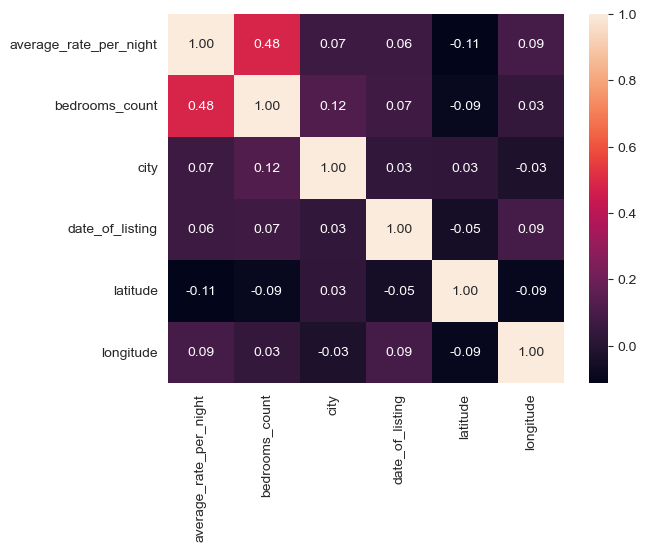

In [140]:
corr = ds.corr()
plt.plot("Correlation matrix")
sns.heatmap(corr, annot=True, fmt='0.2f')
plt.show()

In [141]:

# X = ds.iloc[:, 1:-1].values
# y = ds.iloc[:, 0].values
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)


In [191]:
# from sklearn.ensemble import RandomForestRegressor
#
# regressor = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1,)
# regressor.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [189]:
# y_pred = regressor.predict(X_test)

In [190]:
# from sklearn.metrics import r2_score, accuracy_score
#
# r2_score(y_test, y_pred)

0.3920246920270559